# 1. Import Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

# 2. Load Dataset

In [11]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

print(f"Dataset shape: {X.shape}")
print("Feature names:", housing.feature_names)

Dataset shape: (20640, 8)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# 3. Preprocess / Feature Scaling

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 5. Sample Weights (simulate weights based on distance from median target)

In [14]:
sample_weight = np.abs(y_train - np.median(y_train))
sample_weight /= sample_weight.max()

# 6. Fit ElasticNet Normally (Without Precomputed Gram)

In [15]:
start = time.time()
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, fit_intercept=False, max_iter=10000)
enet.fit(X_train, y_train, sample_weight=sample_weight)
elapsed_normal = time.time() - start
print(f"ElasticNet fit without Gram took: {elapsed_normal:.4f} seconds")

ElasticNet fit without Gram took: 0.0535 seconds


# 7. Fit ElasticNet with Precomputed Gram (Automatically Handled by ElasticNet)

In [16]:
start = time.time()
enet_gram = ElasticNet(alpha=0.1, l1_ratio=0.5, fit_intercept=False, max_iter=10000, precompute=True)
enet_gram.fit(X_train, y_train, sample_weight=sample_weight)
elapsed_gram = time.time() - start
print(f"ElasticNet fit with Gram (auto-precomputed) took: {elapsed_gram:.4f} seconds")

ElasticNet fit with Gram (auto-precomputed) took: 0.0049 seconds


# 8. Predict & Evaluate

In [17]:
y_pred = enet.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (ElasticNet without Gram): {mse:.4f}")

Mean Squared Error (ElasticNet without Gram): 5.1821


# 9. Visualize Coefficients

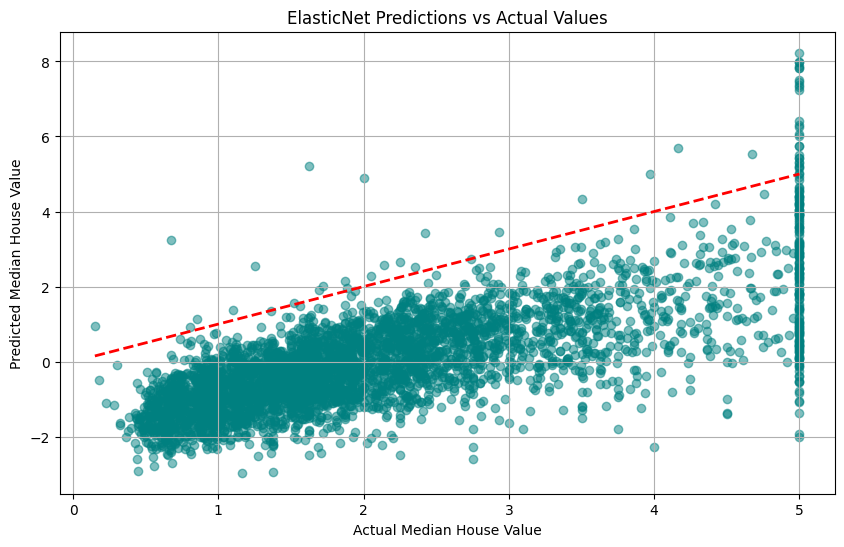

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("ElasticNet Predictions vs Actual Values")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.grid(True)
plt.show()